In [57]:
import pandas as pd
from diff_cap_packages import Xy
from diff_cap_packages import ta
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
X,Y = Xy.get_market_Xy(target_id="930060")

In [59]:
Y = ta.add_ATR(Y, timeperiod=2)
Y = ta.add_RSI(Y, timeperiod=2)
Y = ta.add_SMA(Y, timeperiod=2)
Y = ta.add_EMA(Y, timeperiod=2)
#Y = ta.add_OBV(Y)


In [60]:
Y = Y.dropna()

In [61]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(Y, test_size = 0.2)

x_train = train.drop('930060 +0 day', axis=1)
y_train = train['930060 +0 day']

x_test = test.drop('930060 +0 day', axis = 1)
y_test = test['930060 +0 day']

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [63]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1.9223466236226452
RMSE value for k=  2 is: 1.7038884574416227
RMSE value for k=  3 is: 1.6524329331022074
RMSE value for k=  4 is: 1.595332374565986
RMSE value for k=  5 is: 1.6392686155676144
RMSE value for k=  6 is: 1.610559140768324
RMSE value for k=  7 is: 1.6019378335478591
RMSE value for k=  8 is: 1.5941212789666424
RMSE value for k=  9 is: 1.5720617307934204
RMSE value for k=  10 is: 1.5419628026123628
RMSE value for k=  11 is: 1.53033088069718
RMSE value for k=  12 is: 1.536963104031556
RMSE value for k=  13 is: 1.5397277217445093
RMSE value for k=  14 is: 1.5395596017691389
RMSE value for k=  15 is: 1.5456249167696865
RMSE value for k=  16 is: 1.5514959652042217
RMSE value for k=  17 is: 1.5684474475894885
RMSE value for k=  18 is: 1.5456603511398561
RMSE value for k=  19 is: 1.5359642681049774
RMSE value for k=  20 is: 1.5508763506984513


In [65]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 9}

In [96]:
#predicting on the test set and creating submission file
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=9)

In [97]:
knn_model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=9)

In [98]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(x_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

0.9925449439647059

In [99]:
test_preds = knn_model.predict(x_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

1.5720617307934204

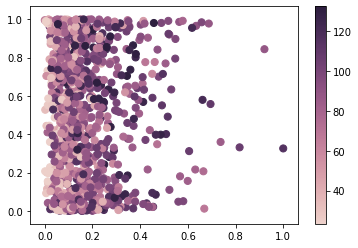

In [100]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(x_test[0], x_test[1], c=test_preds, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

In [95]:
x_test

,0,1,2,3
0,0.098765,0.199334,0.021729,0.020883
1,0.160603,0.395981,0.266285,0.264081
2,0.081182,0.423535,0.742983,0.741145
3,0.229973,0.888766,0.618775,0.621149
4,0.059954,0.589991,0.867323,0.866265
...,...,...,...,...
926,0.040624,0.341073,0.744136,0.743085
927,0.133375,0.596115,0.703516,0.704735
928,0.450972,0.093716,0.857745,0.851929
929,0.196471,0.020636,0.817746,0.817471
